In [7]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import autoneuronet as ann

ann.__version__

'0.1.2'

# Linear Regression


In [8]:
# Linear Regression
n_samples = 10

X = ann.Matrix(n_samples, 1)  # shape: (n_samples, 1)
y = ann.Matrix(n_samples, 1)  # shape: (n_samples, 1)

for i in range(n_samples):
    X[i, 0] = ann.Var(i)
    y[i, 0] = 5.0 * i + 3.0

In [9]:
lr = 1e-2
epochs = 1000

lr_model = ann.NeuralNetwork([ann.Linear(1, 1)])
optimizer = ann.GradientDescentOptimizer(learning_rate=lr, model=lr_model)

lr_model

NeuralNetwork =
Linear(1, 1)

In [10]:
# Training Loop

for epoch in tqdm(range(epochs), desc="Training linear regression model"):
    optimizer.resetGrad()

    # Forward pass
    y_pred = lr_model.forward(X)

    # Calculate the loss
    loss = ann.MSELoss(y, y_pred)
    loss_val = loss.val

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training linear regression model: 100%|██████████| 1000/1000 [00:00<00:00, 109466.12it/s]

Epoch: 1 | Train Loss: 687.4914759298669
Epoch: 101 | Train Loss: 0.4667624069656166
Epoch: 201 | Train Loss: 0.15037983403597968
Epoch: 301 | Train Loss: 0.048448834240317255
Epoch: 401 | Train Loss: 0.01560907121818068
Epoch: 501 | Train Loss: 0.005028874442792541
Epoch: 601 | Train Loss: 0.0016201846867043054
Epoch: 701 | Train Loss: 0.0005219852770023145
Epoch: 801 | Train Loss: 0.00016817133975105132
Epoch: 901 | Train Loss: 5.418083758239348e-05


In [11]:
# Make Predictions
y_pred = lr_model.forward(X)

print(f"Ground Truth Labels:\n{y}\n")
print(f"Final Linear Regression Model Predictions:\n{y_pred}")

first_layer = lr_model.layers[0]
W_learned, b_learned = first_layer.W, first_layer.b

print(f"Learned W(0, 0) = {W_learned[0, 0]}")
print(f"Learned b(0, 0) = {b_learned[0, 0]}")

Ground Truth Labels:
Matrix(10, 1) = 
3.000000 
8.000000 
13.000000 
18.000000 
23.000000 
28.000000 
33.000000 
38.000000 
43.000000 
48.000000 


Final Linear Regression Model Predictions:
Matrix(10, 1) = 
2.992236 
7.993474 
12.994712 
17.995950 
22.997188 
27.998427 
32.999665 
38.000903 
43.002141 
48.003380 

Learned W(0, 0) = Var(val=5.001238, grad=0.000703)
Learned b(0, 0) = Var(val=2.992236, grad=-0.004410)


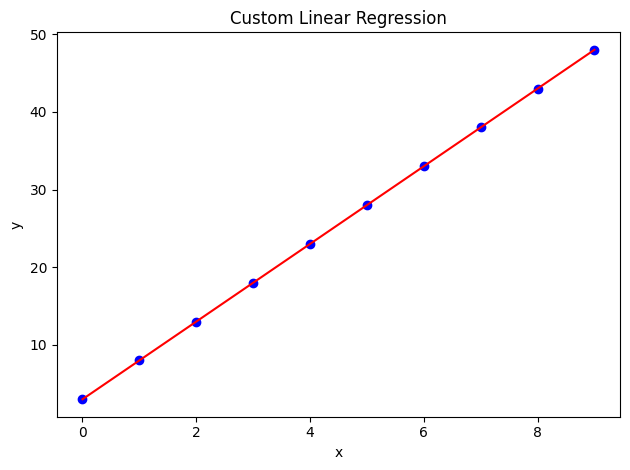

In [12]:
x_np = np.array([X[i, 0].getVal() for i in range(X.rows)])
y_np = np.array([y[i, 0].getVal() for i in range(y.rows)])
y_pred_np = np.array([y_pred[i, 0].getVal() for i in range(y_pred.rows)])

plt.scatter(x_np, y_np, color="blue")
plt.plot(x_np, y_pred_np, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Custom Linear Regression")

plt.tight_layout()
plt.show()

In [13]:
os.makedirs("models", exist_ok=True)
lr_model.saveWeights("models/lr_model.bin")

In [14]:
lr_model.loadWeights("models/lr_model.bin")